In [5]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [6]:
heart_data=pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_data.info()
#Verilerimiz kalp krizini etkileyen bazı faktörler üzerine hazırlanmıştır. 
#Verimizde  cinsiyet ksımı için 0=kadın 1=erkek bireyi ifade etmektedir.
# death_event faktöründe 0 = bireyin hayatta kaldığını 1=ise vefat ettiğini ifade edtmektedir.
#Bunun dışında verimizde 0 yok 1 var olarak kullanılmıştır. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
heart_data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
heart_data.isnull().sum()
#Bu kod satırı ile verimizde null olan ifadeleri bulmayı ve işleme başlamadan önce doğru bir sonuç almak için veriyi kontrol ediyoruz.
#Verimizde null bir ifade olmadığı için herhangi bir işlem yapmayacağız. Ancak eğer null bir ifademiz olsaydı onu temizlememiz ya da bu ifadeleri doldurmamız gerekecekti. 


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021E7ABFEE50>,
      dtype=object)

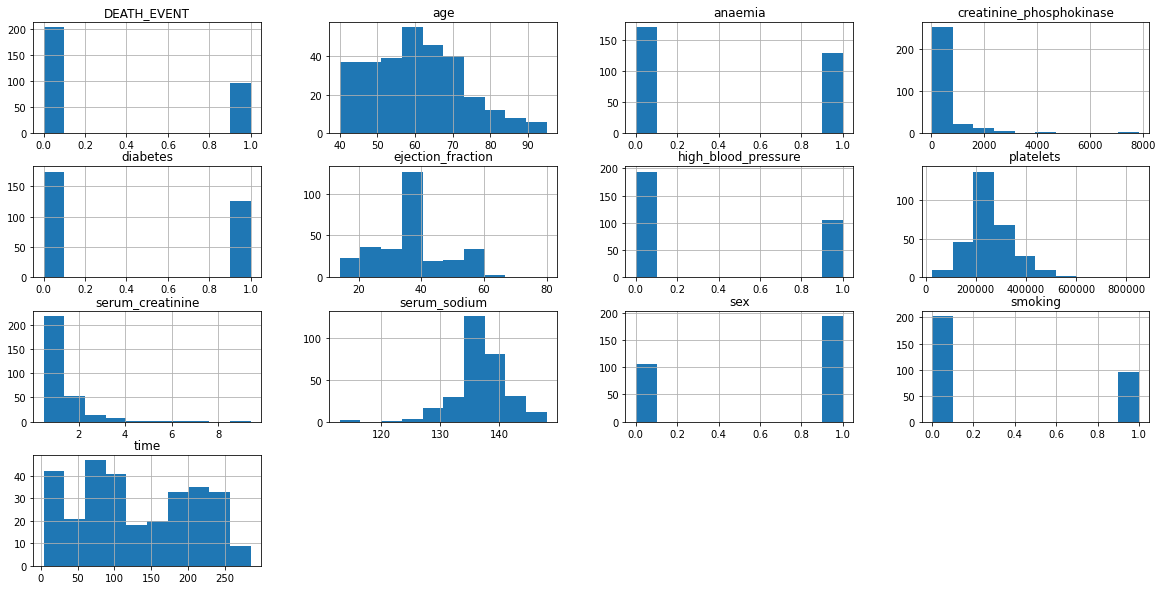

In [9]:
heart_data.hist(figsize=(20,10))
#Verimizi daha yakından tanımak için her faktör için bir histagran grafiği oluşturuyoruz. 
#Bu şekilde veri hakkında genel bilgimizi ediniyoruz. Daha sonra ise faktörlerin kalp krizini nasıl ekilediğini tek tek inceleyeceğiz. 


Text(0.5, 0, 'Age')

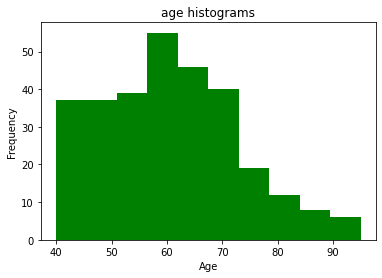

In [10]:
heart_data['age'].plot.hist(title='age histograms', color='green')
plt.xlabel('Age')


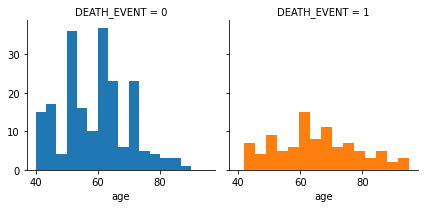

In [11]:
age_hist = sns.FacetGrid(heart_data, col='DEATH_EVENT', hue='DEATH_EVENT')
age_hist.map(plt.hist, 'age', bins=15)
#yaş faktörünün kalp krizine etkenenine baktığımızda özellikle 80 yaşından sonrasındaki bireylerin hayatını kaybetmiş olduğunu görüyoruz.
#80 yaşından küçük bireylerde kapl kriznin yaşa etkisi ile ilgili bir incelemenin tam manasıyla bir sonuç vermediğini söyleyebiliriz.
#Yani bir bireyin yaşı ile kalp krizi hakkıda bir yorumlama yapmamız gerekirse .Ancak öok ileri yaştaki bireylerin bu konudan doğrudan etkilendiğini söyleyebiliriz.
#Bunun dışında kalan bireyler için kap krizinin yalnızca yaş faktörü ile doğrudan bir orantısı olduğunu söylemek pek mümkün değildir. 

CİNSİYET VE YAŞ FAKTÖRLERİNİN BERABER İNCELENMESİ : 

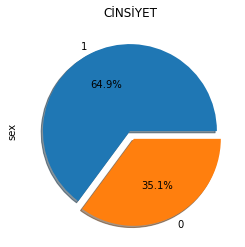

In [12]:
heart_data['sex'].value_counts().plot.pie(explode=[0,0.1],shadow=True,autopct='%1.1f%%',
                                       title= 'CİNSİYET')
#0=female 1=male


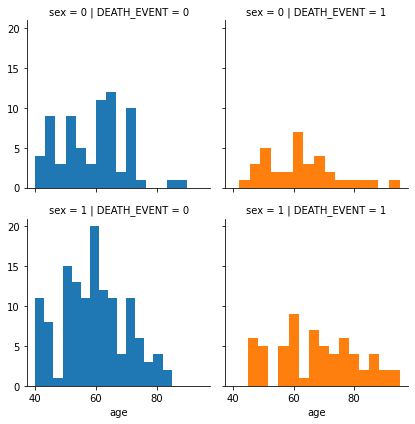

In [13]:
age_sex_hist = sns.FacetGrid(heart_data, col='DEATH_EVENT', row='sex', hue='DEATH_EVENT')
age_sex_hist.map(plt.hist, 'age', bins=15)
#sex= 1:male 0:female   death_event = 0:no 1 :yes 
#diabetes= 0:no  1:yes 
#Yaş ve cinsiyet faktörlerinin ölümle alakalı durumunu incelemek istediğimizde . Şu şekilde bir yorum yapabiliriz. 
#kadın ve erkek hastalar için hayatta kalanlara baktığımızda ; Bu durumun özellikle 50-70 yaş aralığındaki erkeklerde çok daha fazla olduğunu görebiliriyoruz. 
#Bununla birlikte kadınlarda hayatta kalma durumunun çok ileri yaşlarda bile görülmüş olduğunu fark ediyoruz. 
#Hayatını kaybeden bireyler için cinsiyetin ve yaşın etkisinin nasıl olduğunu incelediğimizde 40-60 yaş aralığında kadınlardan her yaş aralığında hayatını kaybedenleri görebiliyoruz 
#Ancak 40-60 yaş aralığındaki erkeklere baktığımızda ise erkek bireylerde yer yer bazı yaşlarda hiç bir bireyin hayatını bkaybetmediğini söyleyebiliz. 
#Yine de baktığımızda 40-60 yaş aralığındaki hayatını kaybeden erkek ve kadınların sayısının birbirine oldukça yakın olduğunu da tespit edebiliriz. 
#60-80 yaş aralığında erkek bireylerin daha fazla hayatını kaybetmiş olduğunu görebiliriz. 
#Aynı şekilde 80 yaştan fazla olan bireylerde de erkek bireylerin daha fazla hayatını kaybetmiş olduğunu görüyoruz.
#Bu incelemeler sonucunda şöyle bir çıkarım yapabilmemiz mümkün olabilir. Özellikle yaş arttığında erkek bireylerde kalp krizi sebebiyle hayatını kaybetme oranının daha fazla olduğunu görüyoruz. 



Diyabet 

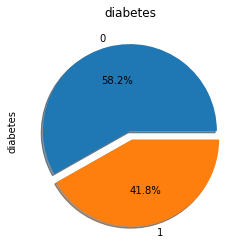

In [14]:
heart_data['diabetes'].value_counts().plot.pie(explode=[0,0.1],shadow=True,autopct='%1.1f%%',
                                       title= 'diabetes')
#Verimize baktığımızda bireylerin %58.2 si diabet hastası değildir ve kalanlar ise diabet hastasıdır .
#Peki bir bireyin diyabet hastası olması kalp krizine nasıl bir etki sağlar ? 

In [15]:
heart_data['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

diabetes  DEATH_EVENT
0         0              118
          1               56
1         0               85
          1               40
Name: DEATH_EVENT, dtype: int64

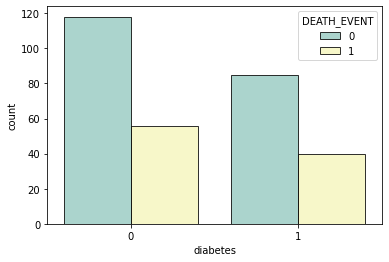

In [16]:
sns.countplot(data=heart_data, x=heart_data['diabetes'], hue="DEATH_EVENT", palette = "Set3", alpha=0.8, edgecolor="k", linewidth=1) 
diabetes=heart_data.groupby('diabetes')
diabetes['DEATH_EVENT'].value_counts() 
#Diyabet hastası olan bireylerden 85 kişinin hayatta kaldığını ancak 40 kadar bireyin hayatını kaybettiğini görüyoruz. Bu durumda diyabet hastası olup hayatta kalan birey oranı 0.32 oluyor.
#Diyabet hastası olmayan bireylerden 56  kişinin hayatını kaybettiğini görüyoruz. 118 kişi ise hayatta kalmıştır .Bu durumda diyabet hastası olmayıp hayatını kaybetme ooranı ise 0.322olduğunu görüyoruz.
#Diyabet hastası olan hayatta kalan bireylerin oranı %68
#Diyabet hastası olmayıp hayatta kalan bireylerin oranı %67.8
#Bu durumda diyabet hastası olmanın kalp krizi ile doğrudan bir ilişkiye sahip olduğunu söylemek pek mümkün değildir. 


ANEMİ 

anaemia  DEATH_EVENT
0        0              120
         1               50
1        0               83
         1               46
Name: DEATH_EVENT, dtype: int64

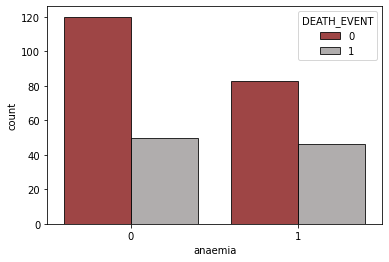

In [17]:
sns.countplot(data=heart_data, x=heart_data['anaemia'], hue="DEATH_EVENT", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1) 
Anaemia=heart_data.groupby('anaemia')
Anaemia['DEATH_EVENT'].value_counts()

high_blood_pressure  DEATH_EVENT
0                    0              137
                     1               57
1                    0               66
                     1               39
Name: DEATH_EVENT, dtype: int64

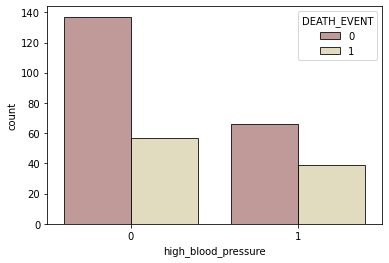

In [18]:
sns.countplot(data=heart_data, x=heart_data['high_blood_pressure'], hue="DEATH_EVENT", palette = "pink", alpha=0.8, edgecolor="k", linewidth=1) 
HBP=heart_data.groupby('high_blood_pressure')
HBP['DEATH_EVENT'].value_counts()

Text(0.5, 0, 'Serum sodium')

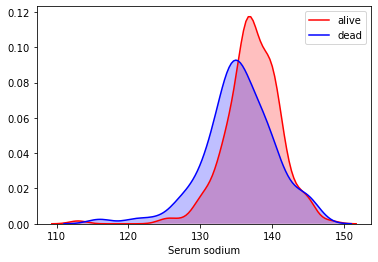

In [19]:
sns.kdeplot(heart_data.loc[(heart_data['DEATH_EVENT']==0), 
            'serum_sodium'], color='r', shade=True, Label='alive') 
  
sns.kdeplot(heart_data.loc[(heart_data['DEATH_EVENT']==1),  
            'serum_sodium'], color='b', shade=True, Label='dead') 
  
plt.xlabel('Serum sodium') 

Text(0.5, 0, 'Ejection fraction')

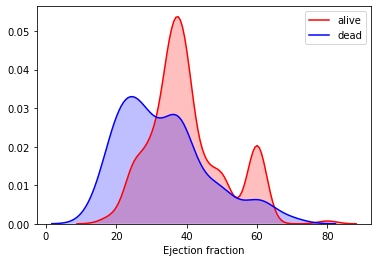

In [20]:
sns.kdeplot(heart_data.loc[(heart_data['DEATH_EVENT']==0), 
            'ejection_fraction'], color='r', shade=True, Label='alive') 
  
sns.kdeplot(heart_data.loc[(heart_data['DEATH_EVENT']==1),  
            'ejection_fraction'], color='b', shade=True, Label='dead') 
  
plt.xlabel('Ejection fraction')  

#Ejeksiyon fraksiyonu (EF) denen bir ölçüm ile her kalp atışında kalbin ne kadar iyi kasıldığı, böylece sistolik veya diyastolik KYayrımı yapılabilir.
#Grafiği incelediğimizde kasılmanın en ideal olduğu sayının 20-50 arası olduğunu fark ediyoruz. Hatta bu aralıkta en ideal olan durum ise 40 .Bu durumda bireylerin hayatta kalma durumlarının daha fazla olduğunu gözlemlemek mümkün. 
#Yine grafiği incelediğimizde kalp kasılması durumunun 20 olduğu durumda ölüm oranının en fazla miktara ulaştığını görebiliyoruz. 


MODELLEMELER 

In [21]:
x=heart_data.iloc[:,:12]
print(x) 
#verilerim dataframe olarak tutulmakta. Bu framin içerisinde bağımsız değişkenlerim mevcut. 

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [22]:
y=heart_data.iloc[:,12:13]
print(y) 
#verilerim dataframe olarak tutulmakta. Bu framin içerisinde bağımlı değişkenim mevcut. 

     DEATH_EVENT
0              1
1              1
2              1
3              1
4              1
..           ...
294            0
295            0
296            0
297            0
298            0

[299 rows x 1 columns]


In [23]:
X=x.values
Y=y.values
#Verilerim numpy array olarak tutuluyor.


In [24]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_ölçekli=sc.fit_transform(X)
y_ölçekli=sc.fit_transform(Y)
#Verimizi ortak bir sayı dünyasına taşımız olduk .Böylece veriyi  modellemede daha doğru sonuçlar alıcaz.
#Ayrıa burada X bağımsız değişkenlerini tutan bir kısım olarak ayarlandı .Daha sonra dilediğimiz faktörleri bağımsız değişken olarak atayıp denemeler yapıcaz.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=0)
#Verilerimizi test ve eğitim olarak ayırdık . %33 lük bir değer kullandık 

PREDİCTİON (TAHMİN MODELLERİ) 

In [26]:
from sklearn.linear_model import LinearRegression
r_ml = LinearRegression()
r_ml.fit(x_train,y_train) #Xten yyi öğretiyoruz. Yani x kullanarak y yi eğitiyoruz.

tahmin1 = r_ml.predict(x_test)
print(tahmin1)
print(y_test)
#MultiLinear Regression modeli ile tahminlerimizi yapıyoruz.

[[-0.06271572]
 [ 0.17301446]
 [ 0.55225623]
 [ 0.09257809]
 [ 0.27625464]
 [ 0.17797458]
 [ 0.614855  ]
 [ 0.01437581]
 [ 0.74885798]
 [ 0.45820389]
 [ 0.17935865]
 [ 0.63028966]
 [ 0.25066903]
 [ 0.21220872]
 [ 0.53504392]
 [ 0.71504694]
 [-0.10402952]
 [ 0.3724829 ]
 [ 0.09992641]
 [-0.06910342]
 [ 0.42915291]
 [ 0.52341557]
 [ 0.52535103]
 [ 0.32852216]
 [ 0.46306305]
 [ 0.1339507 ]
 [ 0.2448582 ]
 [-0.12610875]
 [-0.18344699]
 [ 0.13029216]
 [ 0.12305361]
 [ 0.61490588]
 [ 0.42749378]
 [ 0.38504944]
 [ 0.21555226]
 [ 0.48466236]
 [ 0.34727416]
 [ 0.38926092]
 [-0.27376697]
 [ 0.83479992]
 [-0.15632133]
 [ 0.37866878]
 [ 0.3461496 ]
 [ 0.36412534]
 [ 0.89345686]
 [ 0.33197217]
 [-0.09088394]
 [-0.01376701]
 [ 0.35302165]
 [ 0.49731182]
 [ 0.33599588]
 [-0.02955884]
 [ 0.26296023]
 [ 0.29042283]
 [ 0.71858741]
 [ 0.38132152]
 [ 0.34235502]
 [ 0.81126005]
 [ 0.04671444]
 [ 0.31729105]
 [ 0.7356578 ]
 [ 0.24044728]
 [ 0.27160223]
 [-0.19046999]
 [-0.2461393 ]
 [-0.10216863]
 [ 0.15266

In [27]:
from sklearn.tree import DecisionTreeRegressor
r_dst=DecisionTreeRegressor(random_state=0) 
r_dst.fit(x_train,y_train)
tahmin2=r_dst.predict(x_test)
print("decision tree regression predict")
print(tahmin2)
print(y_test)

decision tree regression predict
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0.]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


In [29]:
from sklearn.ensemble import RandomForestRegressor
 #Tahmin için kullandığımızda Regressor olarak kuulanıyoruz.
 #Bu algoritmalar aynı zamanda sınıflandırma da da kullandığından 
r_rf = RandomForestRegressor(n_estimators=10,random_state=0) 
# n_restimator kaç tane karar ağacı kullanağımızı ayarladığımız parametredir 
r_rf.fit(x_train,y_train)
tahmin3=r_rf.predict(x_test)
print("random forest regression predict")
print(tahmin3)
print(y_test)
#Random forest algoritması ensemble yapılı bir algoritmadır .Yani birden fazla görüşten oluşur.Burda amaç baskın olan görüşü almaktır.
#Yani oy çokluğu ile sonuca karar verilir. n_estimators :algoritmada kullanılmasını istediğimiz karar ağacı sayısını belirlediğimiz bir parametredir.


random forest regression predict
[0.  0.  0.8 0.  0.  0.  0.1 0.  0.4 0.  0.6 0.7 0.  0.  0.8 0.9 0.  0.
 0.  0.2 0.8 0.  0.2 0.3 0.5 0.  0.3 0.1 0.  0.  0.  0.7 0.8 0.  0.  0.6
 0.  0.  0.1 0.9 0.  0.5 0.2 0.4 0.9 0.  0.  0.6 0.9 0.9 0.3 0.  0.2 0.
 1.  0.1 0.  0.9 0.  0.  0.7 0.  0.7 0.  0.  0.1 0.4 0.1 0.8 0.9 0.  0.1
 0.  1.  0.6 0.2 0.8 0.  0.  0.2 0.  0.  0.1 0.4 0.  0.  0.4 0.  0.  0.2
 0.1 0.6 0.  0.  0.  0.9 0.3 1.  0.1]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


<ipython-input-29-95057a1ead0a>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_rf.fit(x_train,y_train)


SINIFLANDIRMA MODELLERİ 

#BU KISIMDA MODELLERİMİZİN BAŞARISINI CONFUSSİON MATRİX KULLANARAK DA ANALİZ EDECEĞİZ. 

In [150]:
from sklearn.linear_model import LogisticRegression
c_lr = LogisticRegression(random_state=0)
c_lr.fit(x_train,y_train) #Xten yyi öğretiyoruz. Yani x kullanarak y yi eğitiyoruz.

tahmin4 = c_lr.predict(x_test)
print(tahmin4)
print(y_test)
#Öncelikle logistic Regression ile model oluşturup tahminimize bakıyoruz.

[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [151]:
from sklearn.naive_bayes import GaussianNB
c_gnb=GaussianNB()
c_gnb.fit(x_train,y_train)
tahmin5=c_gnb.predict(x_test)
print("Naive Bayes")
print(tahmin5)
print(y_test)

Naive Bayes
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [152]:
from sklearn.tree import DecisionTreeClassifier 
c_dst=DecisionTreeClassifier(criterion='entropy')
c_dst.fit(x_train,y_train)
tahmin6=c_dst.predict(x_test)
print("DecisionTreeClassifier ")
print(tahmin6)
print(y_test)

DecisionTreeClassifier 
[0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


In [153]:
from sklearn.neighbors import KNeighborsClassifier
c_knn=KNeighborsClassifier(n_neighbors=5,metric="minkowski")
c_knn.fit(x_train,y_train)
tahmin7=c_knn.predict(x_test)
print("KNN Clacssifier ")
print(tahmin7)
print(y_test)

KNN Clacssifier 
[1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


<ipython-input-153-0f9677a25fd7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  c_knn.fit(x_train,y_train)


In [154]:
from sklearn.ensemble import RandomForestClassifier
c_rf=RandomForestClassifier(n_estimators=10,criterion='entropy')
c_rf.fit(x_train,y_train)
tahmin8=c_rf.predict(x_test)
print("Random Forest Classifier ")
print(tahmin8)
print(y_test)

Random Forest Classifier 
[0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


<ipython-input-154-0b81e105de1d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  c_rf.fit(x_train,y_train)


In [155]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
tahmin9=svc.predict(x_test)
print("Support Vector Classification ")
print(tahmin9)
print(y_test)
#kernel support vector algoritması için farklı şekilde çalıştırması için kullanılan bir parametredir.Burada polinomial gibi bazı seçenekler mevcuttur.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Support Vector Classification 
[0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
152            0
158            0
101            0
54             1
181            1

[99 rows x 1 columns]


In [156]:

cm_lr=confusion_matrix(y_test,tahmin4)
print('Lojistic  Regresyon')
print(cm_lr)
#78 doğru 21 yanlış tahmin

Lojistic  Regresyon
[[64  4]
 [17 14]]


In [157]:
cm_gnb=confusion_matrix(y_test,tahmin5)
print('Naive Bayes')
print(cm_gnb)
#76 doğru 23 yanlış 


Naive Bayes
[[64  4]
 [19 12]]


In [70]:
cm_dst=confusion_matrix(y_test,tahmin6)
print('Dession Tree')
print(cm_dst) 
#81 doğru 18 yanlış 

#Modelimizin ne kadar doğru tahmin yaptığını incelemek amacıyla confusion matrix kullanıyoruz. 
#Ve görüyoruz ki Modelimiz 78 doğru tahmin 21 yanlış tahmin yapmış. Modelimizin %78 lik bir başarı elde ettiğini görüyoruz.

Dession Tree
[[58 10]
 [ 8 23]]


In [158]:
cm_knn=confusion_matrix(y_test,tahmin7)
print('KNN')
print(cm_knn)
#57 doğru 42 yanlış 

KNN
[[47 21]
 [21 10]]


In [159]:
cm_rf=confusion_matrix(y_test,tahmin8)
print('Random Forest')
print(cm_rf)
#83 doğru 14 yanlış 



Random Forest
[[64  4]
 [12 19]]


In [160]:
cm_svc=confusion_matrix(y_test,tahmin9)
print('SVC')
print(cm_svc)
#81 doğru 18 yanlış

SVC
[[65  3]
 [15 16]]


In [161]:
models=pd.Series(['Logistic Regression','Naive Bayes','Decision Tree',
                  'K Nearest Neighbors','Random Forest' ,'Support Vector'])
Accuracy_score=pd.Series([accuracy_score(y_test,tahmin4),accuracy_score(y_test,tahmin5),accuracy_score(y_test,tahmin6),
                         accuracy_score(y_test,tahmin7),accuracy_score(y_test,tahmin8),accuracy_score(y_test,tahmin9)])



In [162]:
Leaderboard=pd.DataFrame({'Models':models,'Accuracy':Accuracy_score})

In [163]:
Leaderboard

,Models,Accuracy
0,Logistic Regression,0.787879
1,Naive Bayes,0.767677
2,Decision Tree,0.828283
3,K Nearest Neighbors,0.575758
4,Random Forest,0.838384
5,Support Vector,0.818182


In [164]:
model=RandomForestClassifier(class_weight='balanced', random_state=0)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_proba=model.predict_proba(x_test)
y_proba=[p[1] for p in y_proba]


<ipython-input-164-24f3da805eb9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


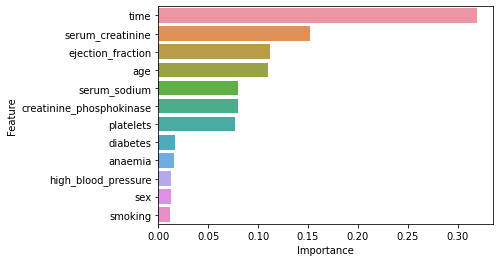

In [165]:
df_feat=pd.DataFrame({'Feature':x.columns,
                      'Importance':model.feature_importances_})
df_feat.sort_values(by='Importance', ascending=False, inplace=True)
df_feat.reset_index(inplace=True)

sns.barplot(x='Importance',y='Feature', data=df_feat, orient='h')
plt.show()